## Observations and Insights

## Dependencies and starter code

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import random 

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
#mouse_metadata.count()
# study_results.count()

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how='inner', on='Mouse ID')
# combined_data.count()
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group the original data by Drug Regimen
regimen_gr = combined_data.groupby(["Drug Regimen"])
# Get a list of regimens and calculate each stat individually
# reg_list = regimen_gr["Drug Regimen"].unique()
reg_mean = regimen_gr["Tumor Volume (mm3)"].mean()
reg_median = regimen_gr["Tumor Volume (mm3)"].median()
reg_var = regimen_gr["Tumor Volume (mm3)"].var()
reg_std = regimen_gr["Tumor Volume (mm3)"].std()
reg_sem = regimen_gr["Tumor Volume (mm3)"].sem()

# Create summary table 
regimen_summary_table = pd.DataFrame({"Average Tumor Volume": round(reg_mean,2),
                                    "Median Tumor Volume": round(reg_median,2),
                                    "Variance of Tumor Volume": round(reg_var,2),
                                    "STD of Tumor Volume": round(reg_std,2),
                                    "SEM of Tumor Volume": round(reg_sem,2)})
regimen_summary_table

,Average Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,STD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

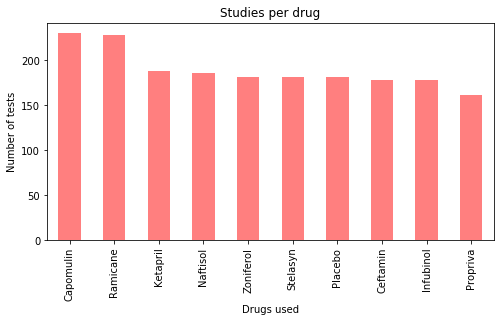

<Figure size 432x288 with 0 Axes>

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Use Pandas to plot a chart with the valu counts of drug regimen. 
drugchart = combined_data["Drug Regimen"].value_counts().plot(kind="bar", figsize=(8,4), alpha=0.5, color='r')

# Rotate the tick labels slightly for readibility
# drugchart.set_xticklabels( combined_data["Drug Regimen"].value_counts(),rotation=60)

# Set title and labels of chart
plt.title("Studies per drug")
plt.xlabel("Drugs used")
plt.ylabel("Number of tests")

# Show the chart and keep it tight
plt.show()
plt.tight_layout()

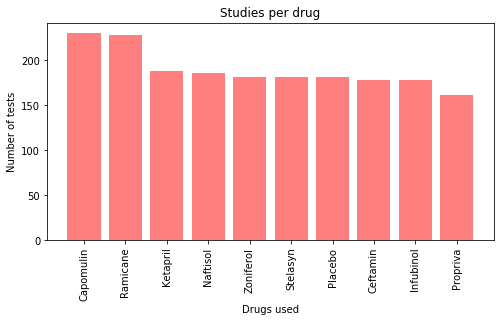

<Figure size 432x288 with 0 Axes>

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Get a series of counts per drug
reg_counts = combined_data["Drug Regimen"].value_counts()

# Set x axis and tick locations
x_axis = np.arange(combined_data["Drug Regimen"].nunique())
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,4))
plt.bar(x_axis, reg_counts, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, reg_counts.keys(), rotation = 90)

# Set title and labels of chart
plt.title("Studies per drug")
plt.xlabel("Drugs used")
plt.ylabel("Number of tests")

# Show the chart and keep it tight
plt.show()
plt.tight_layout()

## Pie plots

(-1.14272521194069, 1.126723612002736, -1.1509808823817114, 1.124033996981642)

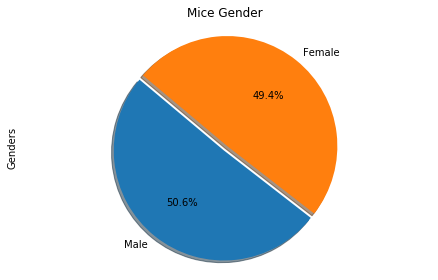

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Get a series of counts per gender
gender_counts = combined_data["Sex"].value_counts()
gender_counts

# Create a pie chart based upon the trip duration of that single bike
explode = (.05, 0)
gender_pie = combined_data["Sex"].value_counts().plot(kind="pie", title=("Mice Gender "),autopct="%1.1f%%",explode = (.05, 0), startangle=140, shadow=True,)
gender_pie.set_ylabel("Genders")

# plt.show()
plt.tight_layout()
plt.axis("equal")

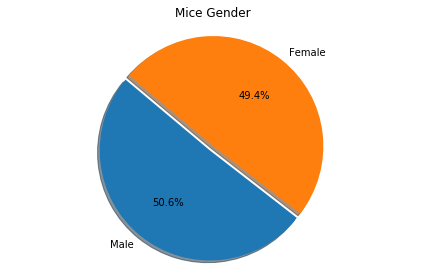

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

explode2 = (.05, 0)
plt.pie(gender_counts, explode=explode2, labels=gender_counts.keys(),
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Set title and labels of chart
plt.title("Mice Gender")
plt.tight_layout()
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_sums_list = []
for x in range(len(drug_list)):
    subset = combined_data.loc[(combined_data["Drug Regimen"] == drug_list[x]), :]
    group = subset.groupby(["Mouse ID"])
    sums = group["Tumor Volume (mm3)"].sum()
    drug_sums_list.append(sums)
    quartiles = sums.quantile([.25,.5,.75])
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of tumor volumes for {drug_list[x]} is: {round(lowerq,2)}")
    print(f"The upper quartile of tumor volumes for {drug_list[x]} is: {round(upperq,2)}")
    print(f"The interquartile range of tumor volumes for {drug_list[x]} is: {round(iqr,)}")
    print(f"The the median of tumor volumes for {drug_list[x]} is: {round(quartiles[0.5],2)} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {round(lower_bound,2)} could be outliers.")
    print(f"Values above {round(upper_bound,2)} could be outliers.")
    print("------------------------------------------------------------")




The lower quartile of tumor volumes for Capomulin is: 361.82
The upper quartile of tumor volumes for Capomulin is: 425.07
The interquartile range of tumor volumes for Capomulin is: 63.0
The the median of tumor volumes for Capomulin is: 398.87 
Values below 266.94 could be outliers.
Values above 519.95 could be outliers.
------------------------------------------------------------
The lower quartile of tumor volumes for Ramicane is: 360.5
The upper quartile of tumor volumes for Ramicane is: 407.01
The interquartile range of tumor volumes for Ramicane is: 47.0
The the median of tumor volumes for Ramicane is: 388.08 
Values below 290.73 could be outliers.
Values above 476.78 could be outliers.
------------------------------------------------------------
The lower quartile of tumor volumes for Infubinol is: 250.34
The upper quartile of tumor volumes for Infubinol is: 539.8
The interquartile range of tumor volumes for Infubinol is: 289.0
The the median of tumor volumes for Infubinol is: 368

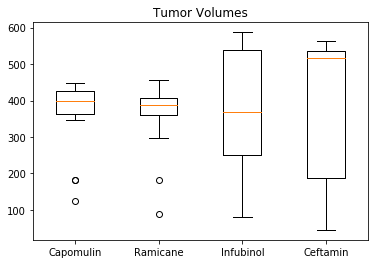

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_data = [drug_sums_list[0], drug_sums_list[1], drug_sums_list[2], drug_sums_list[3], ]

x_axis = np.arange(1, len(drug_list)+1)
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes')
ax1.boxplot(plot_data)
plt.xticks(tick_locations, drug_list)
plt.show()

## Line and scatter plots

['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601']
x401


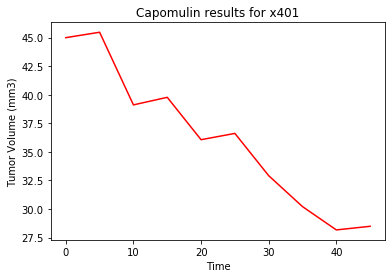

In [33]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

only_capomulin = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin", :]
capomulin_mice = only_capomulin["Mouse ID"].unique()
mouse = random.choice(capomulin_mice)
print(capomulin_mice)
print(mouse)
mouse_data = only_capomulin.loc[only_capomulin["Mouse ID"] == mouse , :]
# mouse_data

plt.plot(mouse_data["Timepoint"], mouse_data['Tumor Volume (mm3)'],"r-")
plt.title("Capomulin results for " + mouse)
plt.xlabel('Time')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


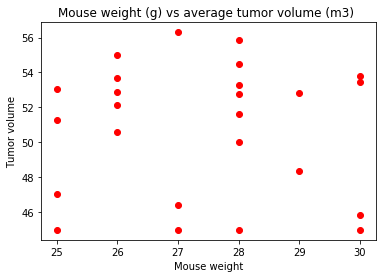

In [40]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouseID_group = subset.groupby(["Mouse ID"])
avg_weight = mouseID_group["Weight (g)"].mean()
avg_tumor = mouseID_group['Tumor Volume (mm3)'].mean()
avg_weight
avg_tumor

# mouseID_group.plot(kind="scatter", figsize=(20,3))

# # Set a title for the chart
# plt.title("Average Rain Per State")

# plt.show()
# plt.tight_layout()

plt.scatter( avg_weight, avg_tumor, marker="o", color="red")
plt.title("Mouse weight (g) vs average tumor volume (m3) ")
plt.xlabel("Mouse weight")
plt.ylabel("Tumor volume")
plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen